___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to **"Bike Demand Visualization Project"** which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

### 2.Read dataset

In [2]:
df=pd.read_csv("store_sharing.csv")
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### 3.Check missing values and if there are any dublicate rows or not.

In [3]:
df.isnull().any(axis=1).value_counts()

False    17414
dtype: int64

In [4]:
df.isnull().sum(axis=0)

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

### 4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

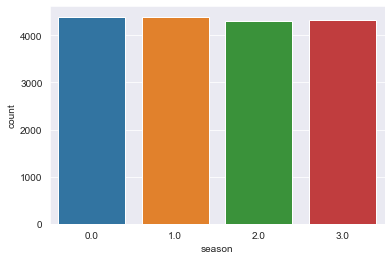

In [5]:
# season
fig, ax=plt.subplots()
ax=sns.barplot(x=df.season.value_counts().index,
            y=df.season.value_counts().values,
            data=df)
ax.set(xlabel='season', ylabel='count');


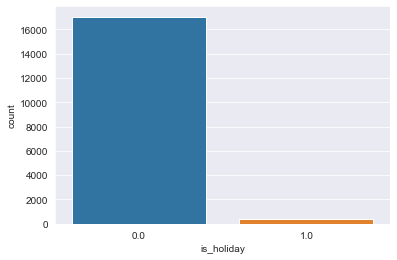

In [6]:
# is_holiday
fig, ax=plt.subplots()
ax=sns.barplot(x=df.is_holiday.value_counts().index,
            y=df.is_holiday.value_counts().values,
            data=df)
ax.set(xlabel='is_holiday', ylabel='count');

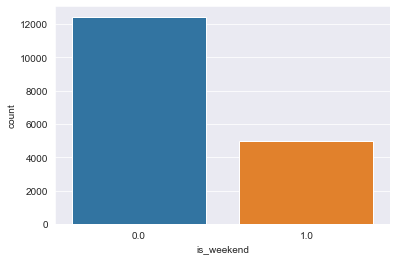

In [7]:
# is_weekend
fig, ax=plt.subplots()
ax=sns.barplot(x=df.is_weekend.value_counts().index,
            y=df.is_weekend.value_counts().values,
            data=df)
ax.set(xlabel='is_weekend', ylabel='count');


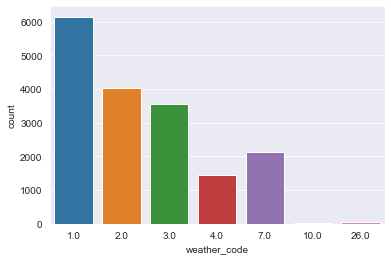

In [8]:
# weather_code
fig, ax=plt.subplots()
ax=sns.barplot(x=df.weather_code.value_counts().index,
            y=df.weather_code.value_counts().values,
            data=df)
ax.set(xlabel='weather_code', ylabel='count');

### 5.Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [10]:
df.set_index("timestamp",inplace=True)
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


- Tam 2 yillik bir timestamp var. `year, month, day_of_month, day_of_week, hour` bilgilerini alarak feature engineering yapalim

### 6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

you can use strftime('%Y-%m') for year_mount

In [11]:
df.reset_index(inplace=True)
df["timestamp"]=pd.to_datetime(df["timestamp"])
df["year_month"] = df["timestamp"].map(lambda x: x.strftime('%Y-%m') if x else '')
df["year"] = df["timestamp"].map(lambda x: x.strftime('%Y') if x else '')
df["month"] = df["timestamp"].map(lambda x: x.strftime('%m') if x else '')
df["day_of_month"] = df["timestamp"].map(lambda x: x.strftime('%d') if x else '')
df["day_of_week"] = df["timestamp"].dt.dayofweek
df["hour"] = df["timestamp"].map(lambda x: x.strftime('%H') if x else '')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
 10  year_month    17414 non-null  object        
 11  year          17414 non-null  object        
 12  month         17414 non-null  object        
 13  day_of_month  17414 non-null  object        
 14  day_of_week   17414 non-null  int64         
 15  hour          17414 non-null  object

In [13]:
df["year"]= df["year"].astype(int)
#df["year_month"]= df["year_month"].astype(int)
df["month"]= df["month"].astype(int)
df["hour"]= df["hour"].astype(int)
df["day_of_month"]= df["day_of_month"].astype(int)

In [14]:
df.set_index("timestamp",inplace=True)
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


### 7.Visualize the correlation with a heatmap

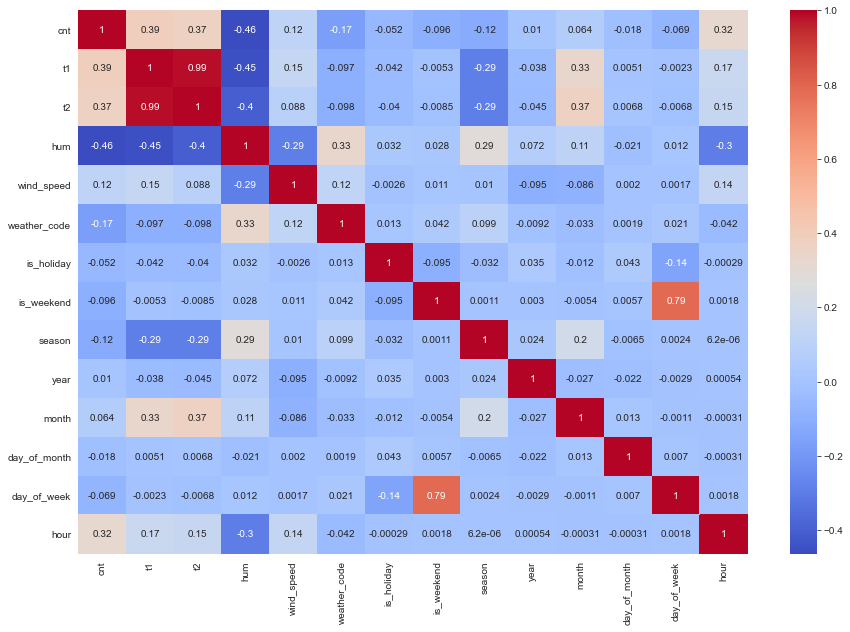

In [15]:
# for all variables
plt.subplots(figsize=(15,10))
sns.heatmap(data=df.corr(), cmap="coolwarm", annot=True);

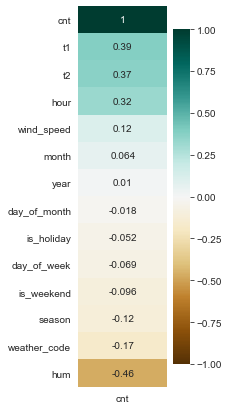

In [41]:
# for the target variable
dd=df.corr().iloc[:,0]
dd=pd.DataFrame(dd)
dd.sort_values(by="cnt",ascending=False,inplace=True)

plt.subplots(figsize=(2,7))
sns.heatmap(dd,  cmap="BrBG", annot=True, center=0, vmin=-1, vmax=1,cbar_kws={"shrink": .90});

### 8. Visualize the correlation of the target variable and the other features with barplot

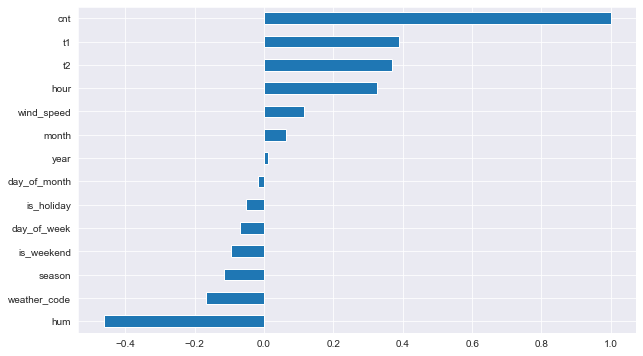

In [42]:
#with pandas
dd.sort_values(by="cnt", inplace=True)
dd.plot(kind="barh",figsize=(10,6), legend=False)
plt.show();

### 9.Plot bike shares over time use lineplot

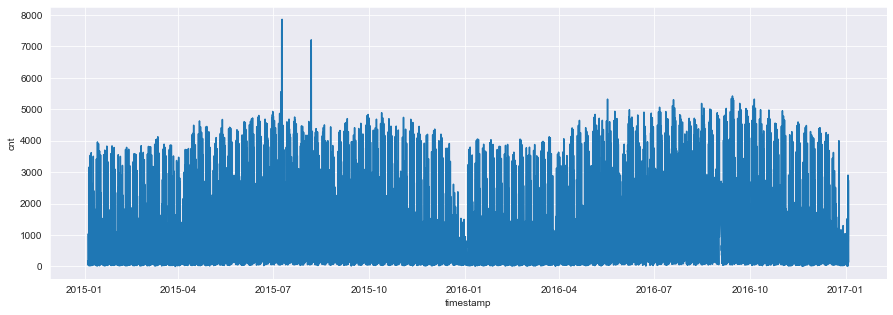

In [43]:
fig, ax=plt.subplots(figsize=(15,5))
ax=sns.lineplot(x=df.index, y=df['cnt'], data=df)
ax.set(xlabel='timestamp', ylabel='cnt');

### 10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

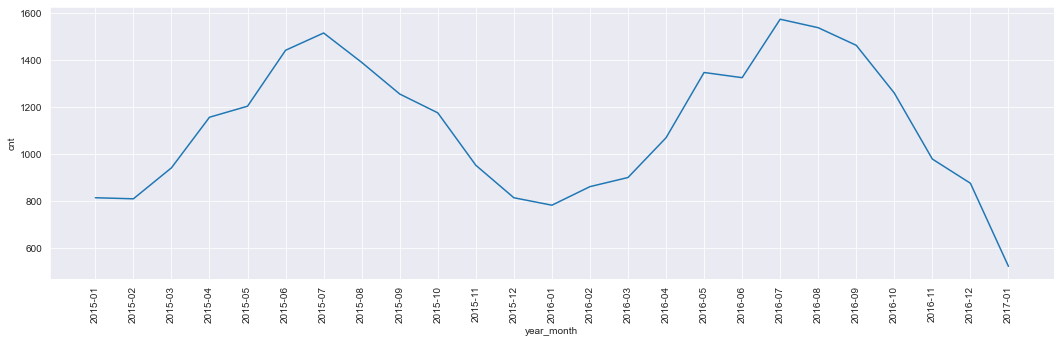

In [44]:
# with lineplot
fig, ax=plt.subplots(figsize=(18,5))
ax=sns.lineplot(x=df["year_month"], y=df['cnt'], data=df, ci=None)
plt.xticks(rotation=90)
ax.set(xlabel='year_month', ylabel='cnt');


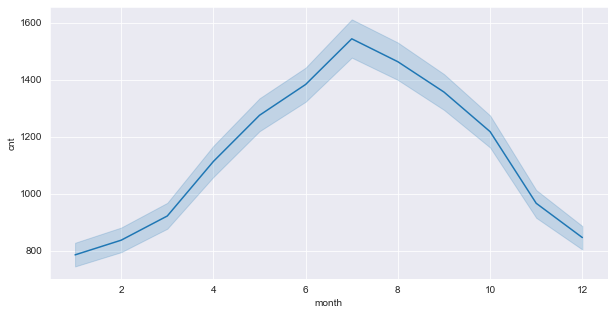

In [45]:
# with lineplot
fig, ax=plt.subplots(figsize=(10,5))
ax=sns.lineplot(x=df["month"], y=df['cnt'], data=df)
#plt.xticks(rotation=90)
ax.set(xlabel='month', ylabel='cnt');


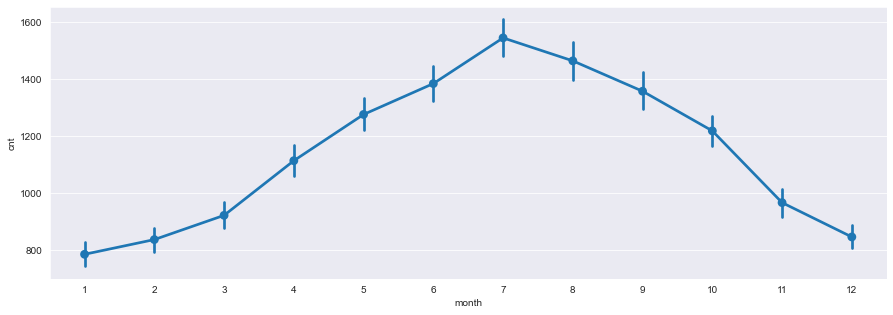

In [46]:
# with pointplot
fig, ax=plt.subplots(figsize=(15,5))
ax=sns.pointplot(x=df["month"], y=df['cnt'], data=df)
#plt.xticks(rotation=90)
ax.set(xlabel='month', ylabel='cnt');

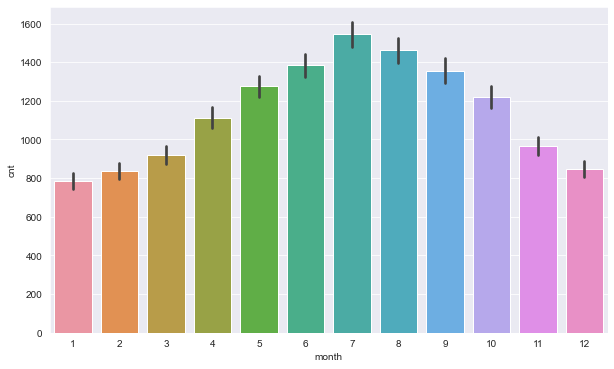

In [47]:
# with barplot
fig, ax=plt.subplots(figsize=(10,6))
ax=sns.barplot(x=df["month"], y=df['cnt'], data=df)
#plt.xticks(rotation=90)
ax.set(xlabel='month', ylabel='cnt');

### 11.Plot bike shares by hours on (holidays, weekend, season)

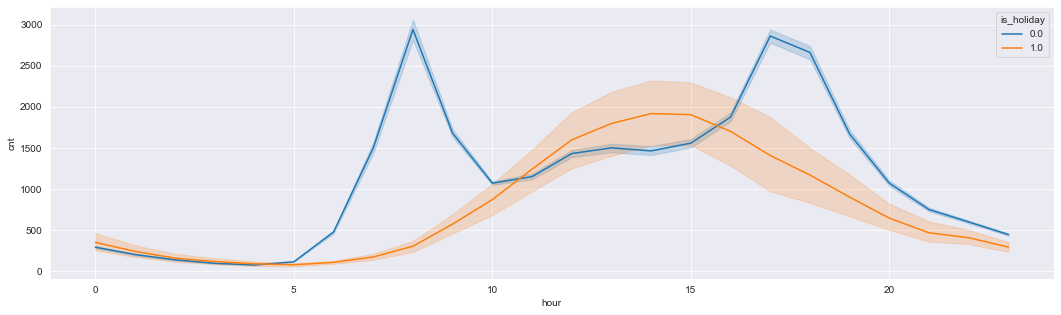

In [48]:
# with lineplot (*whether it is a holiday or not*)
fig, ax=plt.subplots(figsize=(18,5))
ax=sns.lineplot(x=df["hour"], y=df['cnt'], data=df, hue="is_holiday")
#plt.xticks(rotation=90)
ax.set(xlabel='hour', ylabel='cnt');

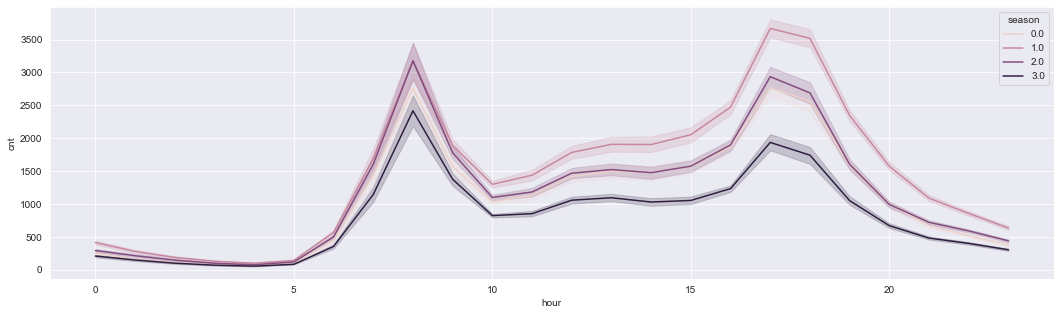

In [49]:
# with lineplot (*You may want to see seasonal breakdowns*)
fig, ax=plt.subplots(figsize=(18,5))
ax=sns.lineplot(x=df["hour"], y=df['cnt'], data=df, hue="season")
#plt.xticks(rotation=90)
ax.set(xlabel='hour', ylabel='cnt');

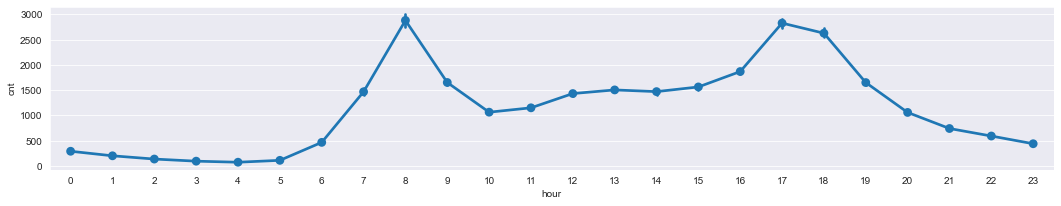

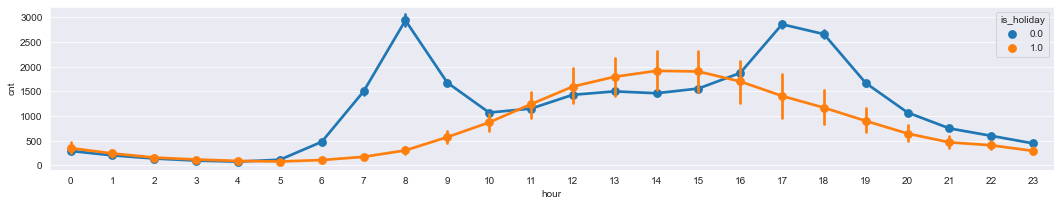

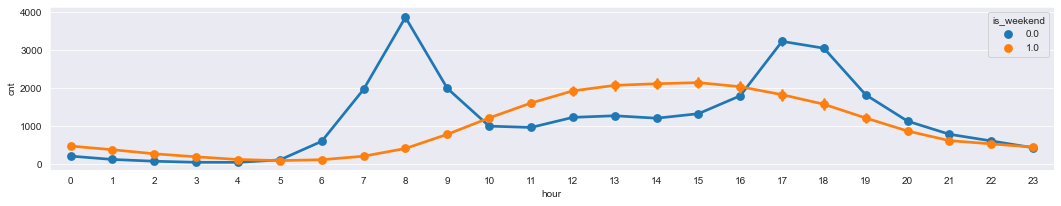

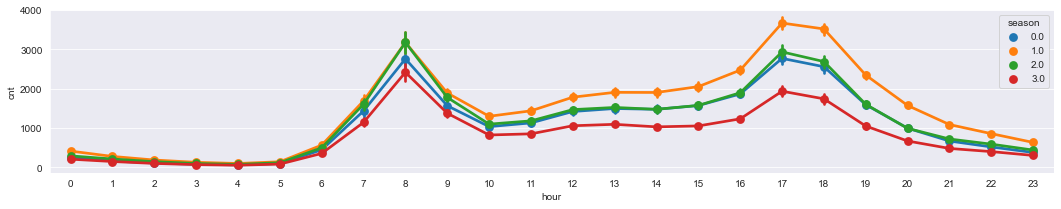

In [51]:
# with pointplot
fig, ax=plt.subplots(figsize=(18,3))
ax=sns.pointplot(x=df["hour"], y=df['cnt'], data=df )
#plt.xticks(rotation=90)
ax.set(xlabel='hour', ylabel='cnt');

fig, ax=plt.subplots(figsize=(18,3))
ax=sns.pointplot(x=df["hour"], y=df['cnt'], data=df, hue="is_holiday")
#plt.xticks(rotation=90)
ax.set(xlabel='hour', ylabel='cnt');

fig, ax=plt.subplots(figsize=(18,3))
ax=sns.pointplot(x=df["hour"], y=df['cnt'], data=df, hue="is_weekend")
#plt.xticks(rotation=90)
ax.set(xlabel='hour', ylabel='cnt');

fig, ax=plt.subplots(figsize=(18,3))
ax=sns.pointplot(x=df["hour"], y=df['cnt'], data=df, hue="season")
#plt.xticks(rotation=90)
ax.set(xlabel='hour', ylabel='cnt');



### 12.Plot bike shares by day of week
- You may want to see whether it is a holiday or not

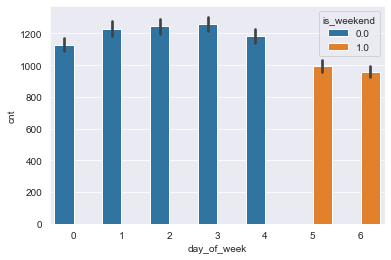

In [52]:
# with barplot
fig, ax=plt.subplots()
ax=sns.barplot(x=df["day_of_week"],
            y=df["cnt"],
            data=df, hue="is_weekend")
ax.set(xlabel='day_of_week', ylabel='cnt');

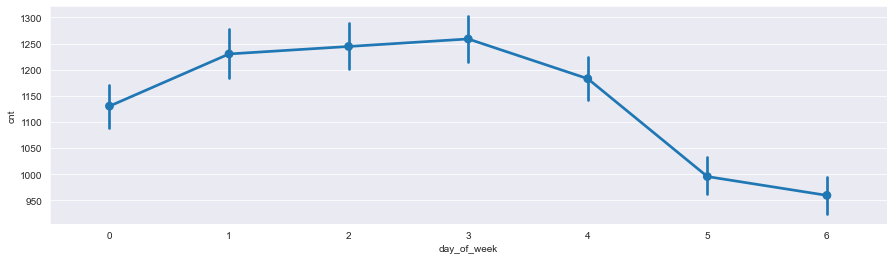

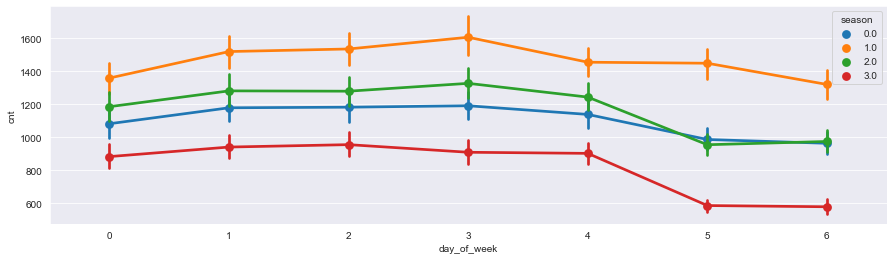

In [67]:
# with pointplot
df["day_of_week"].value_counts();

fig, ax=plt.subplots(figsize=(15,4))
ax=sns.pointplot(x=df["day_of_week"],
            y=df["cnt"],
            data=df)
ax.set(xlabel='day_of_week', ylabel='cnt');

fig, ax=plt.subplots(figsize=(15,4))
ax=sns.pointplot(x=df["day_of_week"],
                 y=df["cnt"],
                 data=df,
                 hue="season")
ax.set(xlabel='day_of_week', ylabel='cnt');

### 13.Plot bike shares by day of month

day_of_month,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1127,1144,1140,1211,1194,1222,1261,1157,...,1127,1173,1054,1190,1081,1130,1062,1079,1156,968


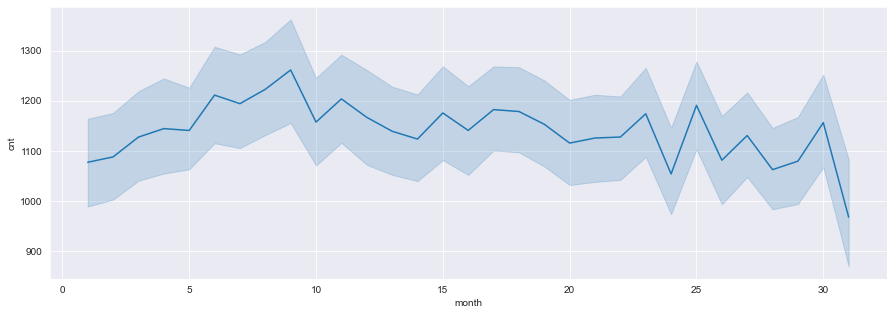

In [205]:
#with lineplot

from threading import Thread

def func1(df):
    dfs=pd.DataFrame(df.groupby("day_of_month")["cnt"].mean()).astype(int)
    dfs_t=dfs.T
    display(dfs_t)
    
def func2(df):
  
    ax =plt.subplots(figsize=(15,5))
    ax=sns.lineplot(x=df["day_of_month"], y=df["cnt"], data=df)
    ax.set(xlabel='month', ylabel='cnt');

if __name__ == '__main__':
    Thread(target = func1(df)).start()
    Thread(target = func2(df)).start()

### 14.Plot bike shares by year
### Plot bike shares on holidays by seasons

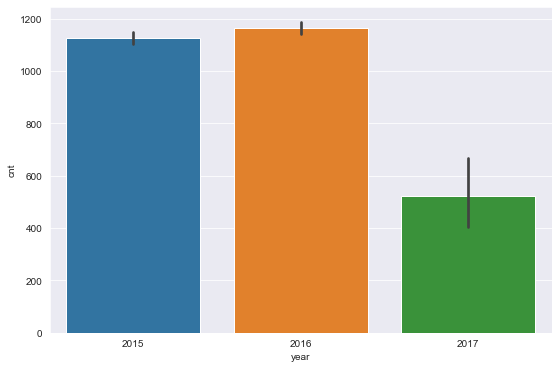

In [68]:
# with barplot
fig, ax=plt.subplots(figsize=(9,6))
ax=sns.barplot(x=df["year"],
            y=df["cnt"],
            data=df)
ax.set(xlabel='year', ylabel='cnt');

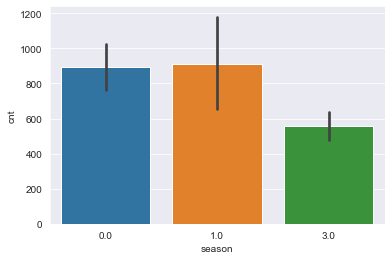

In [69]:
# with barplot
fig, ax=plt.subplots()
ax=sns.barplot(x=df[df["is_holiday"]==1]["season"],
            y=df["cnt"],
            data=df)
ax.set(xlabel='season', ylabel='cnt');

### 15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

In [70]:
df["is_weekend"].value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

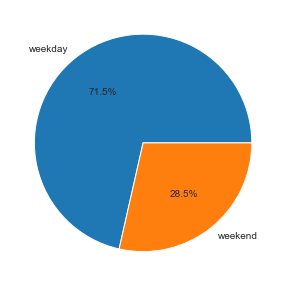

In [71]:
# pie chart
plt.figure(figsize=(5,5))

plt.pie(df["is_weekend"].value_counts().values,
        labels=["weekday","weekend"],
        autopct='%1.1f%%',
        startangle=0)

plt.axis()
plt.show()

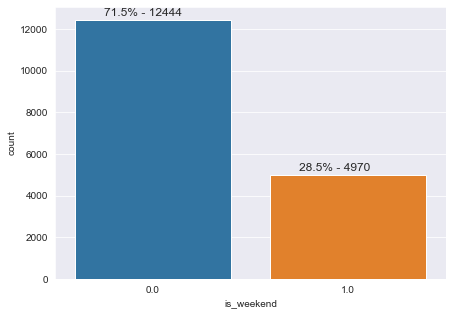

In [72]:
def text_on_top(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        text = percentage + " - " + str(p.get_height())
        x = p.get_x() + p.get_width() / 2 - 0.25
        y = p.get_y() + p.get_height()+200
        ax.annotate(text, (x, y), size = 12)


# with countplot
fig, ax=plt.subplots(figsize=(7,5))

ax=sns.countplot(x="is_weekend", data=df, order=df["is_weekend"].value_counts().index)

text_on_top(ax,df.is_weekend)


### 16.Plot the distribution of weather code by seasons

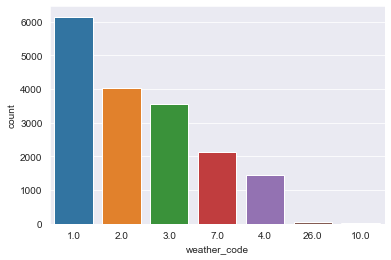

In [73]:
# with countplot
fig, ax=plt.subplots()
ax=sns.countplot(x="weather_code", data=df, order=df["weather_code"].value_counts().index)

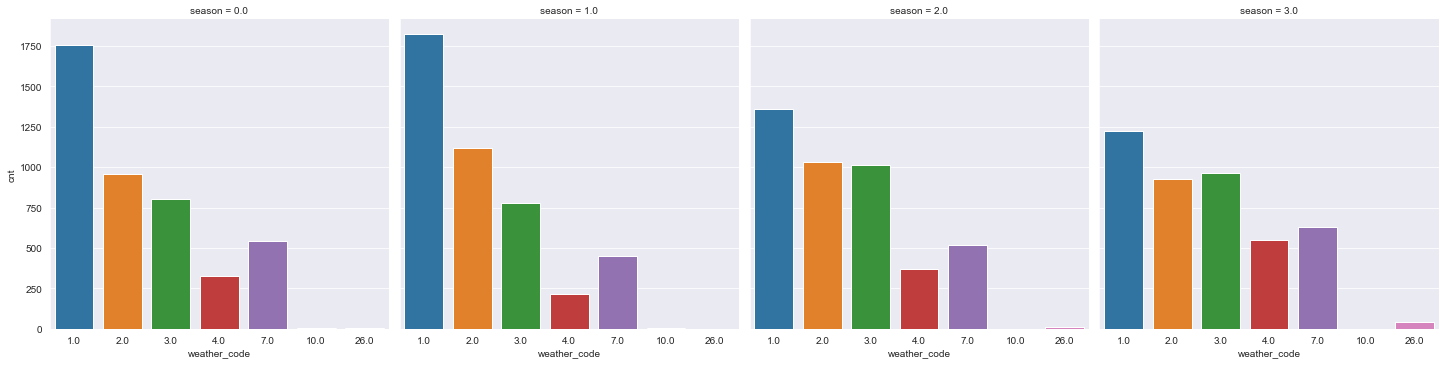

In [91]:
# with catplot
sns.catplot(x="weather_code", y="cnt", data=df, kind="bar", col="season", estimator=np.count_nonzero);


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___